<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/Random%20Fotrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes
None

Missing values:
 Prepare a model for glass classification using Random Forest    1
dtype: int64

Summary statistics:
        Prepare a model for glass classification using Random Forest
count                                                  18          
unique                                                 18          
top                                     Data Description:          
freq                                                    1          


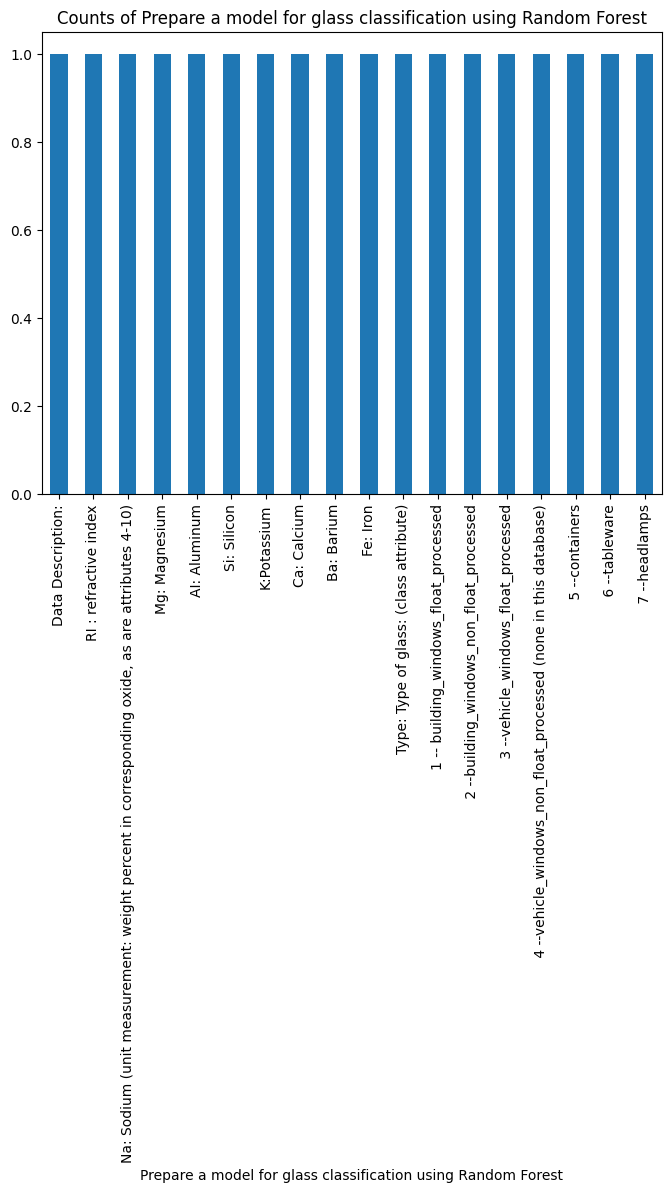


Value counts for Prepare a model for glass classification using Random Forest:
Prepare a model for glass classification using Random Forest
Data Description:                                                                               1
RI : refractive index                                                                           1
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)    1
Mg: Magnesium                                                                                   1
AI: Aluminum                                                                                    1
Si: Silicon                                                                                     1
K:Potassium                                                                                     1
Ca: Calcium                                                                                     1
Ba: Barium                                                                 

In [1]:
# prompt: 1. Exploratory Data Analysis (EDA):
# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, inconsistencies in the data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
try:
  df = pd.read_excel('/content/glass.xlsx')
except FileNotFoundError:
  print("Error: '/content/glass.xlsx' not found. Please upload the dataset or provide the correct file path.")
  df = None  # Indicate that the DataFrame couldn't be loaded

if df is not None:
  # Display basic information about the dataset
  print(df.info())

  # Check for missing values
  print("\nMissing values:\n", df.isnull().sum())

  # Summary statistics
  print("\nSummary statistics:\n", df.describe())

  # Visualize data distribution for numerical features
  for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


  # Visualize relationships between numerical features (if any)
  if len(df.select_dtypes(include=['number']).columns) > 1: # Check if more than one numeric column is present to avoid errors.
      sns.pairplot(df.select_dtypes(include=['number']))
      plt.show()


  # Explore categorical features (if any)
  for col in df.select_dtypes(include=['object', 'category']):
      plt.figure(figsize=(8, 6))
      df[col].value_counts().plot(kind='bar')
      plt.title(f'Counts of {col}')
      plt.show()
      print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

  # Look for outliers using box plots (for numerical features)
  for col in df.select_dtypes(include=['number']):
      plt.figure(figsize=(8, 6))
      sns.boxplot(y=df[col])
      plt.title(f'Box Plot of {col}')
      plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


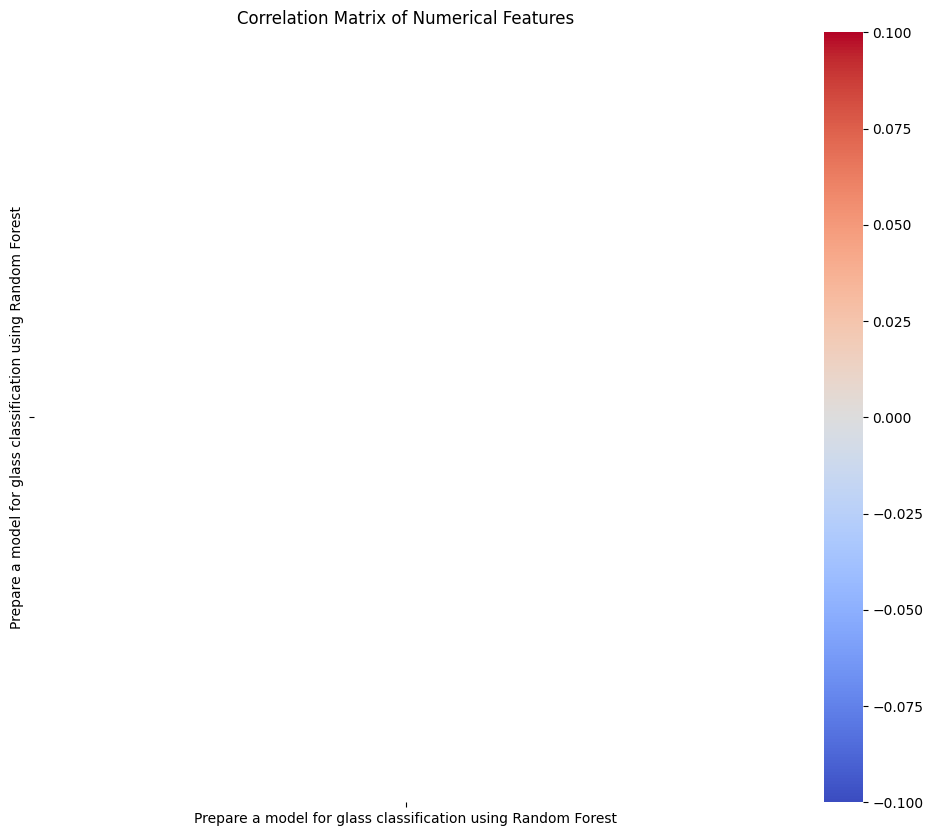

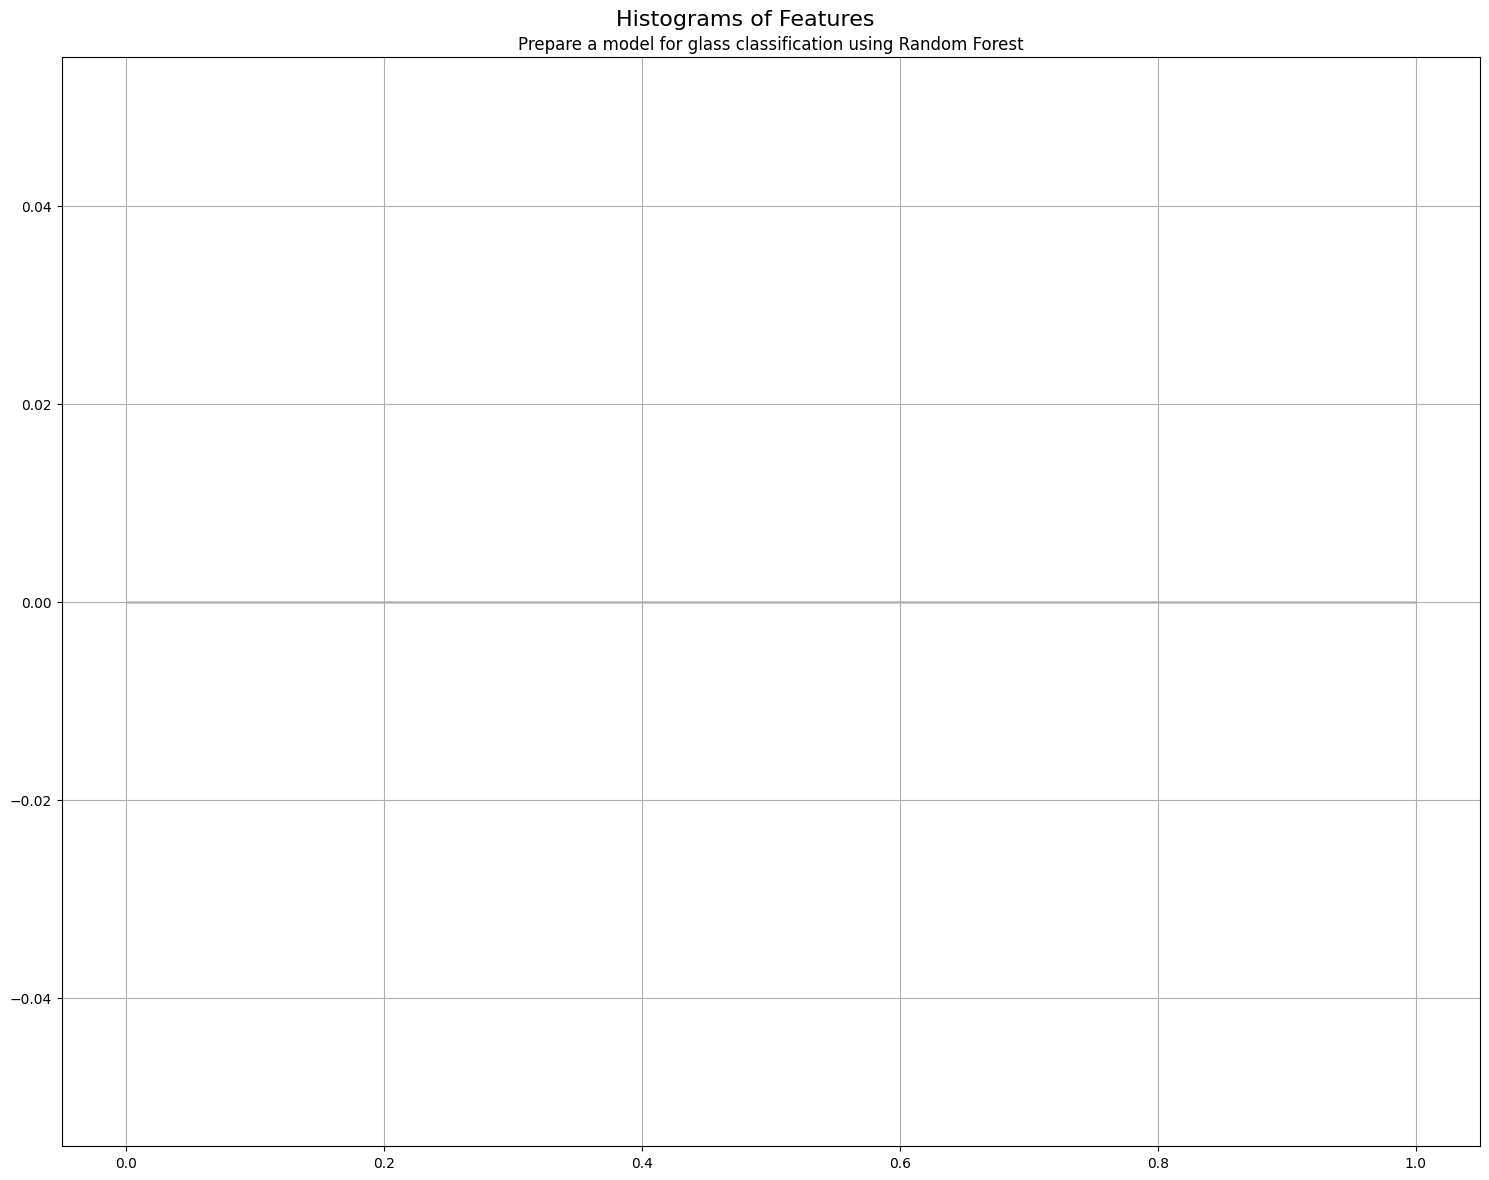

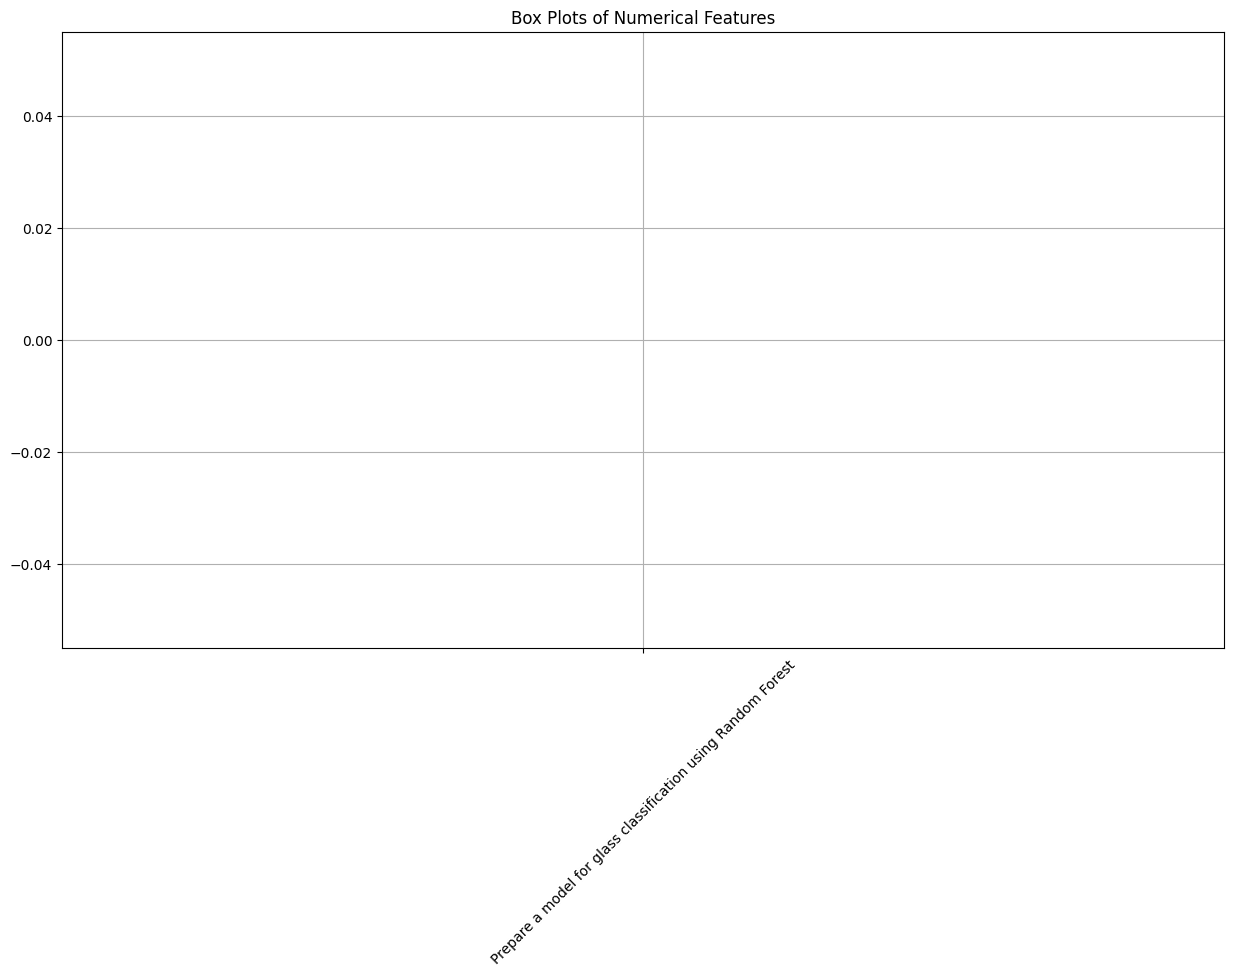

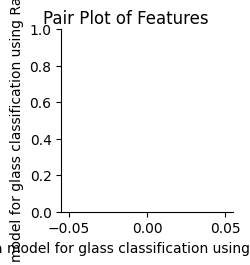

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clean dataset (replace this with your actual loading code)
# Example placeholder:
# df = pd.read_csv("glass.csv") or from Excel

# Ensure all features are numeric
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# 1. Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Histograms
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Box plots
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# 4. Pair plot (if dataset isn't too large)
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


In [10]:
import pandas as pd
df = pd.read_excel("glass.xlsx", header=None)
print(df.head(10))


                                                   0
0  Prepare a model for glass classification using...
1                                  Data Description:
2                              RI : refractive index
3  Na: Sodium (unit measurement: weight percent i...
4                                      Mg: Magnesium
5                                       AI: Aluminum
6                                        Si: Silicon
7                                        K:Potassium
8                                        Ca: Calcium
9                                         Ba: Barium


In [15]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# 1. File‐existence check
FILE = "/content/glass.xlsx"  # ← Adjust this path to where your actual file lives
if not os.path.isfile(FILE):
    raise FileNotFoundError(f"❌ Glass dataset not found at '{FILE}'. Please check the path and try again.")

# 2. Load the data (now that we know the file is there)
df = pd.read_excel(FILE)
print("✅ Successfully loaded glass dataset with shape:", df.shape)
print(df.head())

# 3. Handling Missing Values
print("\n🔍 Missing values before processing:\n", df.isnull().sum())
for col in df.select_dtypes(include=['number']):
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# 4. Categorical encoding (if 'Type' is non‑numeric)
if 'Type' in df.columns and not pd.api.types.is_numeric_dtype(df['Type']):
    print("\nEncoding categorical target 'Type' into one-hot.")
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    enc = encoder.fit_transform(df[['Type']])
    enc_df = pd.DataFrame(enc, columns=encoder.get_feature_names_out(['Type']))
    df = pd.concat([df.drop('Type', axis=1).reset_index(drop=True),
                    enc_df.reset_index(drop=True)], axis=1)

# 5. Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Type', errors='ignore')
if numeric_cols.any():
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    print("\n✅ Scaled numeric columns:", list(numeric_cols))
else:
    print("\n⚠️ No numeric features found to scale.")

# 6. Handling Imbalanced Data
if 'Type' in df.columns:
    X = df.drop('Type', axis=1)
    y = df['Type']
    print("\n🔢 Original class distribution:\n", y.value_counts())

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    print("\n✅ Class distribution after SMOTE:\n", y_res.value_counts())
    df = pd.concat([X_res, y_res.rename('Type')], axis=1)
else:
    print("\n⚠️ No target column 'Type' found—skipping SMOTE.")

print("\n✅ Preprocessing complete. Sample of processed DataFrame:")
print(df.head())


✅ Successfully loaded glass dataset with shape: (19, 1)
  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          

🔍 Missing values before processing:
 Prepare a model for glass classification using Random Forest    1
dtype: int64

⚠️ No numeric features found to scale.

⚠️ No target column 'Type' found—skipping SMOTE.

✅ Preprocessing complete. Sample of processed DataFrame:
  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnes

In [18]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Locate and load the sheet that actually contains the numeric glass data
FILE = "/content/glass.xlsx"
if not os.path.isfile(FILE):
    raise FileNotFoundError(f"Glass dataset not found at '{FILE}'")

# Inspect all sheets and pick the one with >2 numeric columns
xls = pd.ExcelFile(FILE)
df = None
for sheet in xls.sheet_names:
    tmp = xls.parse(sheet)
    numeric_cols = tmp.select_dtypes(include=['number']).columns
    if len(numeric_cols) >= 2:
        df = tmp.copy()
        print(f"✅ Using sheet '{sheet}' with numeric columns: {list(numeric_cols)}")
        break
if df is None:
    raise ValueError("No sheet with numeric columns found—please check your file.")

# 2. If the target column isn't named 'Type', assume it's the last column
if 'Type' not in df.columns:
    df.rename(columns={df.columns[-1]: 'Type'}, inplace=True)
print("Columns after rename:", df.columns.tolist())

# 3. Preprocessing
# 3a. Missing‐value imputation (mean for numeric)
for col in df.select_dtypes(include=['number']):
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
# 3b. Encode 'Type' if categorical
if not pd.api.types.is_numeric_dtype(df['Type']):
    enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    Y_enc = enc.fit_transform(df[['Type']])
    # If binary classification, collapse back to single 0/1 label
    if Y_enc.shape[1] == 1:
        df['Type'] = Y_enc.ravel()
    else:
        # multi‐class: keep numeric codes
        df['Type'] = df['Type'].astype('category').cat.codes

# 3c. Scale numeric features
num_cols = df.select_dtypes(include=['number']).columns.drop('Type')
if len(num_cols) > 0:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

# 3d. Handle class imbalance with SMOTE
X = df.drop('Type', axis=1)
y = df['Type']
print("Original class distribution:\n", y.value_counts())
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("Resampled class distribution:\n", pd.Series(y_res).value_counts())

# 4. Random Forest Modeling
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 5. Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')

print(f"\nModel performance on test set:")
print(f"  Accuracy : {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall   : {rec:.3f}")
print(f"  F1‐score : {f1:.3f}")


✅ Using sheet 'glass' with numeric columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
Columns after rename: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
Original class distribution:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
Resampled class distribution:
 Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

Model performance on test set:
  Accuracy : 0.924
  Precision: 0.926
  Recall   : 0.924
  F1‐score : 0.923


In [21]:
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- (re)train your Random Forest baseline if you haven't already ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 1. Bagging (using DecisionTree as the base estimator)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# 2. AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

# 3. Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluation helper
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} performance:")
    print(f"  Accuracy : {accuracy_score(y_true, y_pred):.3f}")
    print(f"  Precision: {precision_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"  Recall   : {recall_score(y_true, y_pred, average='weighted'):.3f}")
    print(f"  F1-score : {f1_score(y_true, y_pred, average='weighted'):.3f}")

# Compare all models
evaluate_model("Random Forest",    y_test, y_pred_rf)
evaluate_model("Bagging",          y_test, y_pred_bagging)
evaluate_model("AdaBoost",         y_test, y_pred_adaboost)
evaluate_model("Gradient Boosting",y_test, y_pred_gb)



Random Forest performance:
  Accuracy : 0.924
  Precision: 0.926
  Recall   : 0.924
  F1-score : 0.923

Bagging performance:
  Accuracy : 0.935
  Precision: 0.937
  Recall   : 0.935
  F1-score : 0.935

AdaBoost performance:
  Accuracy : 0.533
  Precision: 0.472
  Recall   : 0.533
  F1-score : 0.479

Gradient Boosting performance:
  Accuracy : 0.946
  Precision: 0.952
  Recall   : 0.946
  F1-score : 0.946


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. Explain Bagging and Boosting methods. How is it different from each other.

**Bagging (Bootstrap Aggregating)** and **Boosting** are two fundamental ensemble learning techniques that combine multiple “weak” learners to form a stronger predictive model. While both aim to improve performance over a single model, they differ in *how* they build and combine those learners.

---

## 1. Bagging

* **Core Idea**

  * Train multiple copies of the *same* base learner in **parallel** on different subsets of the data, then **aggregate** their predictions (e.g. by majority vote for classification or averaging for regression).

* **How It Works**

  1. **Bootstrap sampling**: For each of *M* learners, draw a random sample **with replacement** from the training set (so some points may repeat, others omitted).
  2. **Independent training**: Train each base learner (e.g. a decision tree) on its own bootstrap sample.
  3. **Aggregation**:

     * **Classification**: final prediction is the majority vote of all learners.
     * **Regression**: final prediction is the average of all learners’ outputs.

* **Key Properties**

  * **Reduces variance**: By averaging many high‑variance models, it smooths out their fluctuations.
  * **Resilient to overfitting** when base learners are high‑variance (e.g., deep trees).
  * **Parallelizable**: Since each learner is trained independently, bagging is easy to distribute.

* **Popular Example**

  * **Random Forest**: An extension of bagging where each split in each tree considers only a random subset of features—adds an extra layer of randomness to further decorrelate trees.

---

## 2. Boosting

* **Core Idea**

  * Train base learners **sequentially**, where each learner tries to correct the errors of its predecessors. Predictions are combined via a **weighted sum** (or vote), giving more weight to models that perform better.

* **How It Works**

  1. **Initialize** uniform sample weights.
  2. For *t* = 1…*T* (number of learners):

     * Train base learner *hₜ* on the weighted training set.
     * Compute its error, then **increase weights** on misclassified (or high‑residual) examples so the next learner focuses on them.
  3. **Combine** learners’ predictions using weights that reflect each learner’s accuracy.

* **Key Properties**

  * **Reduces bias**: By focusing successive learners on hard examples, it builds a strong, low‑bias model.
  * **Can overfit** if too many learners or if learners are too complex.
  * **Sequential**: Each learner depends on the previous ones, making it harder to parallelize.

* **Popular Examples**

  * **AdaBoost**: The original boosting algorithm, reweights training examples based on misclassification.
  * **Gradient Boosting**: Fits each new learner to the **residual errors** of the current ensemble, using gradient descent on a loss function (e.g., XGBoost, LightGBM, CatBoost).

---

## 3. Key Differences

| Aspect                | Bagging                                              | Boosting                                                   |
| --------------------- | ---------------------------------------------------- | ---------------------------------------------------------- |
| **Training Style**    | Parallel: each model trains independently            | Sequential: each model builds on previous ones             |
| **Focus**             | Variance reduction (smooths predictions)             | Bias reduction (focuses on difficult cases)                |
| **Data Sampling**     | Bootstrap sampling (random subsets with replacement) | Reweighting of all examples based on past errors           |
| **Model Combination** | Simple averaging or majority vote                    | Weighted sum or vote based on learner performance          |
| **Overfitting Risk**  | Generally low (especially with many trees)           | Higher if too many/complex learners without regularization |
| **Parallelization**   | Easy (independent learners)                          | Harder (sequential dependency)                             |

---

### 🔑 When to Use Which

* **Bagging / Random Forest**

  * You suspect your base learner has **high variance** (e.g., deep decision trees).
  * You need a quick, robust baseline that parallelizes well.

* **Boosting (AdaBoost, Gradient Boosting)**

  * You need to **squeeze out more accuracy** by focusing on hard‑to‑predict instances.
  * You’re okay with longer training times and careful regularization to avoid overfitting.




2. Explain how to handle imbalance in the data.



Imbalanced datasets—where one class (or a few classes) has many more examples than the others—can lead most standard classifiers to be biased toward the majority class. Here are the main strategies for handling class imbalance:

---

## 1. Data–Level Methods (Resampling)

### a. **Random Oversampling**

* **What it is**: Duplicate random examples from the minority class until class counts are balanced.
* **Pros**: Simple to implement; can improve minority‐class recall.
* **Cons**: May lead to overfitting (since you’re literally copying the same points).

### b. **Random Undersampling**

* **What it is**: Randomly remove examples from the majority class to match the minority class size.
* **Pros**: Simple; reduces training time.
* **Cons**: Risks discarding useful information and underfitting.

### c. **Synthetic Oversampling (SMOTE, ADASYN, etc.)**

* **SMOTE (Synthetic Minority Over‑sampling Technique)**: Creates new synthetic minority examples by interpolating between a minority sample and its nearest neighbors.
* **ADASYN**: A variant of SMOTE that adaptively focuses more on “harder” minority examples.
* **Pros**: Introduces diversity in the minority class; often better than naïve duplication.
* **Cons**: Can create class overlap and noise if not tuned carefully.

### d. **Hybrid Methods**

* **Combine oversampling and undersampling**—for example, use SMOTE to generate new minority data, then Tomek Links (or Edited Nearest Neighbors) to clean overlapping points.

---

## 2. Algorithm–Level Methods

### a. **Cost‑Sensitive Learning / Class Weights**

* **What it is**: Penalize misclassification of the minority class more heavily in the model’s loss function.
* **How to use**:

  * In scikit‑learn classifiers (e.g. `RandomForestClassifier`, `SVC`), set `class_weight='balanced'` or provide a custom weight dict.
  * In decision trees and boosting libraries (e.g. XGBoost, LightGBM), adjust the `scale_pos_weight` or `is_unbalance` parameters.
* **Pros**: Doesn’t change the data distribution; integrates neatly into many algorithms.
* **Cons**: Needs careful choice of weights; some learners may become unstable if weights are extreme.

### b. **Threshold Moving**

* **What it is**: Train the model normally but adjust the probability threshold for classification (e.g. instead of 0.5, use a lower threshold for the minority class to boost recall).
* **Pros**: Simple post–training tweak.
* **Cons**: Choosing the right threshold can be tricky; may trade off precision.

---

## 3. Ensemble Methods for Imbalanced Data

### a. **Balanced Bagging / Balanced Random Forest**

* Each tree in the forest is trained on a balanced bootstrap sample (random undersample of the majority plus all minority).

### b. **Boosting Variants**

* **RUSBoost**: Combines random undersampling with AdaBoost.
* **SMOTEBoost**: Combines SMOTE oversampling with AdaBoost.

These methods build on the idea of rebalancing at each iteration, leading to stronger performance on minority classes without wholesale data modification.

---

## 4. Evaluation with Imbalanced Metrics

Even after rebalancing, it’s crucial to choose the right metrics:

* **Precision–Recall Curve & AUC‑PR**: More informative than ROC‑AUC when classes are highly skewed.
* **F<sub>β</sub>-scores**: Let you weight recall higher than precision (e.g., F<sub>2</sub>).
* **Confusion Matrix Analysis**: Focus on recall for the minority class and fallout for the majority.

---

## 5. Practical Workflow

1. **Baseline**: Train a model as‑is and record minority‑class recall/precision.
2. **Resampling Experiments**: Try random oversampling, undersampling, SMOTE, or a hybrid and compare metrics with cross‑validation.
3. **Algorithmic Tweaks**: Apply class weights or threshold moving on top of the best data‐level method.
4. **Ensemble Methods**: If needed, switch to balanced bagging or boosting variants.
5. **Final Evaluation**: Use precision–recall curves and domain‑specific cost considerations before choosing the deployed model.
